FAKE NEWS UNIT 🕵️🕵️🕵️

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df_fake = pd.read_csv("../../data/raw/Fake.csv")
df_real = pd.read_csv("../../data/raw/True.csv")


In [3]:
df_fake.isnull().sum()
df_real.isnull().sum()


title      0
text       0
subject    0
date       0
dtype: int64

In [4]:
df_fake['label'] = "FAKE"
df_real['label'] = 'REAL'

In [5]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


In [6]:
df_fake['text'] = df_fake['title'] + ' ' + df_fake['text']

In [7]:
df_fake['label'].value_counts()

label
FAKE    23481
Name: count, dtype: int64

In [8]:
df_fake = df_fake[['text','label']]
df_fake.head()

,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,FAKE


In [9]:
df_real = df_real[['text','label']]
df_real.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,REAL
1,WASHINGTON (Reuters) - Transgender people will...,REAL
2,WASHINGTON (Reuters) - The special counsel inv...,REAL
3,WASHINGTON (Reuters) - Trump campaign adviser ...,REAL
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,REAL


In [10]:
df = pd.concat([df_real,df_fake])

In [11]:
df.head()
df['label'].value_counts()

label
FAKE    23481
REAL    21417
Name: count, dtype: int64

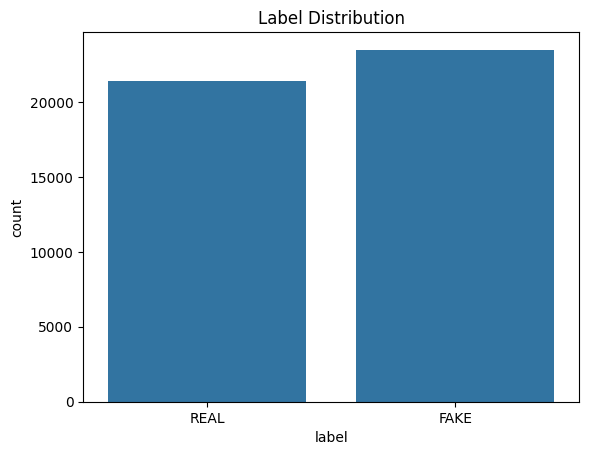

In [12]:
sns.countplot(x='label',data=df)
plt.title('Label Distribution')
plt.show()

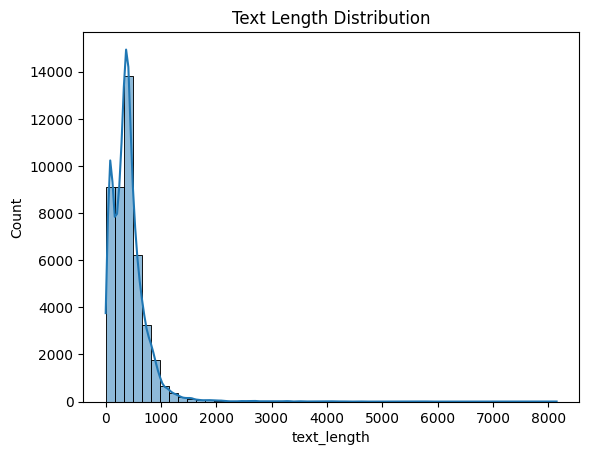

In [13]:
df['text_length']  = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'],bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()

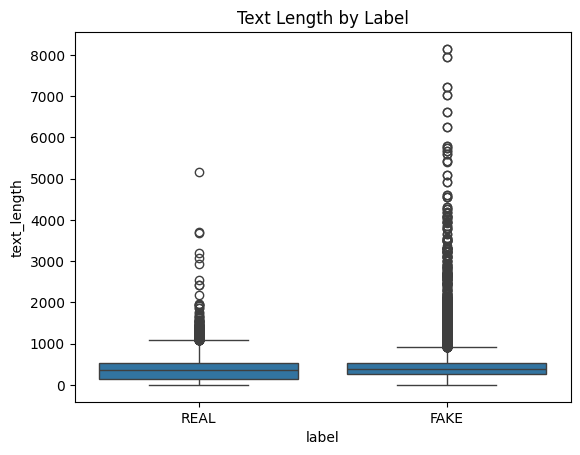

label
FAKE    437.930710
REAL    385.640099
Name: text_length, dtype: float64


In [14]:
df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))

sns.boxplot(x='label',y='text_length',data=df)
plt.title("Text Length by Label")
plt.show()

print(df.groupby('label')['text_length'].mean())